# Logistic Regression
Logistic Regression is used for Classification ONLY

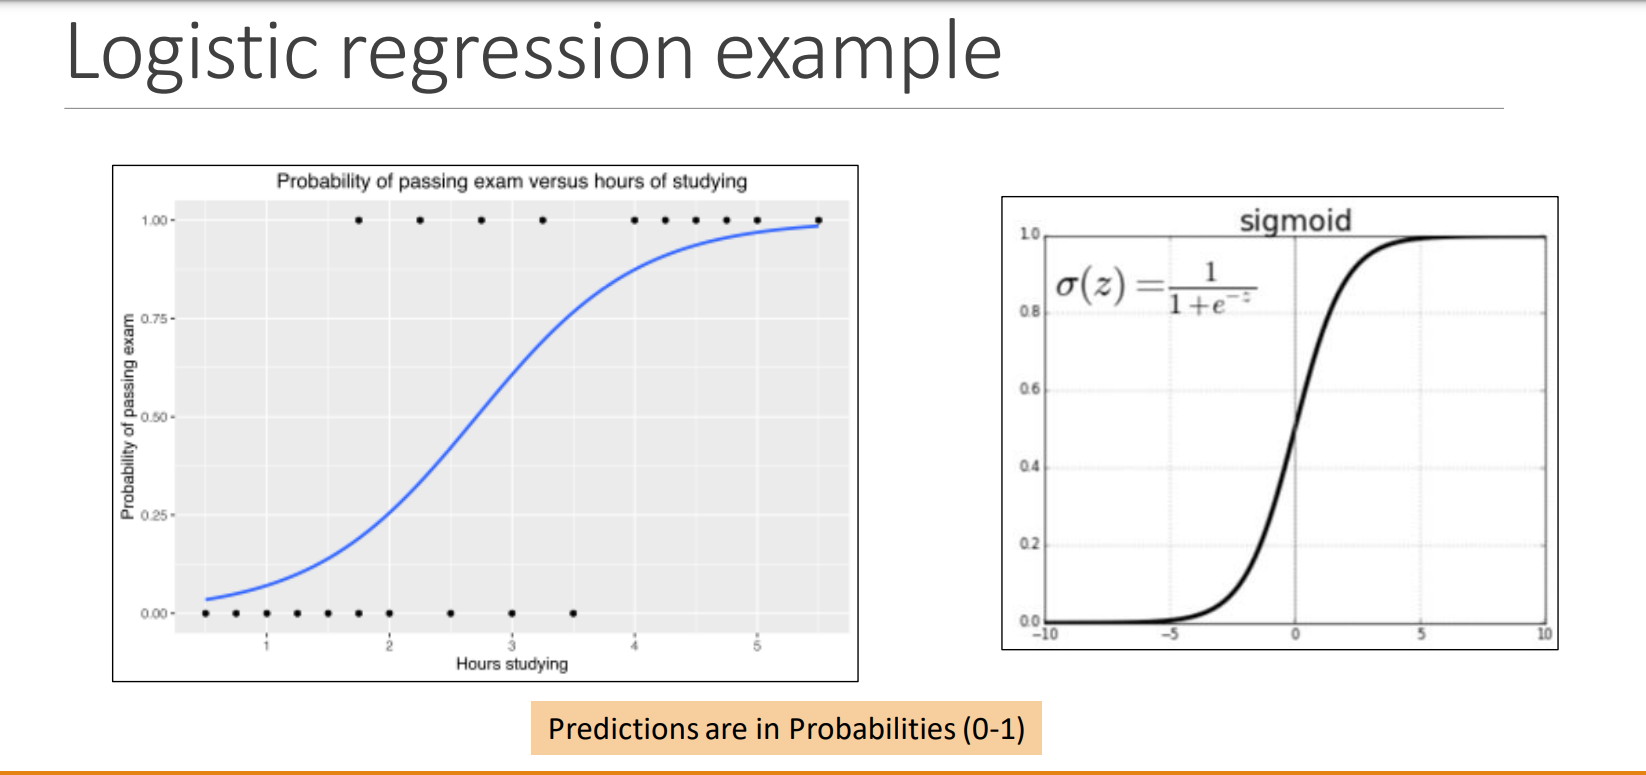

In [59]:
from warnings import filterwarnings
filterwarnings("ignore") 

### Step 1 - Data Ingestion

In [60]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Target - species
### Step 2 - Perform Basic Data Quality Checks

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [63]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [64]:
df.duplicated().sum()

np.int64(1)

In [65]:
# Drop the duplicate values
df = df.drop_duplicates(keep = "first").reset_index(drop = True)
df.shape

(149, 5)

### Step 3 - Separate X and Y(species)

In [66]:
X = df.drop(columns = ["species"])
Y = df[["species"]]

In [67]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [68]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [69]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

<Axes: xlabel='species'>

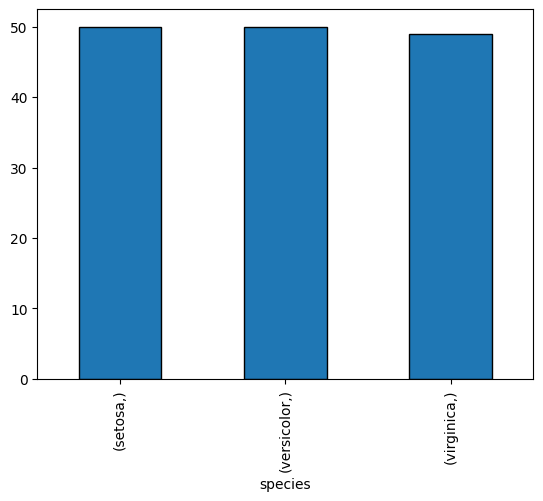

In [70]:
Y.value_counts().plot(kind = "bar", edgecolor = "black")

### Step 4 - Apply Preprocessing on X

In [71]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

### Because only numeric features are there in X, hence i will use only numerical pipeline here

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [73]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
).set_output(transform = "pandas")

In [74]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


### Step 5 - Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size = 0.33, random_state = 21)

In [76]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.275726,0.092598,0.653295,0.401770
49,-1.018798,0.552499,-1.333255,-1.308624
65,1.034197,0.092598,0.369502,0.270202
117,2.241842,1.702254,1.674949,1.322752
55,-0.173447,-0.597255,0.426261,0.138633


In [77]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
117,virginica
55,versicolor


In [78]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052682,-1.057157,0.142468,0.007064
44,-0.898033,1.702254,-1.049462,-1.045486
7,-1.018798,0.782450,-1.276496,-1.308624
21,-0.898033,1.472303,-1.276496,-1.045486
95,-0.173447,-0.137353,0.255985,0.007064


In [79]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [80]:
xtrain.shape

(99, 4)

In [81]:
xtest.shape

(50, 4)

### Step 6 - Model Building

In [82]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(xtrain, ytrain)

LogisticRegression()

In [83]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [84]:
model.intercept_

array([-0.19049869,  1.77556317, -1.58506448])

In [85]:
model.coef_

array([[-0.92044478,  1.21398442, -1.60769839, -1.59905047],
       [ 0.43056509, -0.4368165 , -0.21171527, -0.76576883],
       [ 0.48987968, -0.77716791,  1.81941365,  2.3648193 ]])

### Model Evaluation

In [86]:
# Accuracy on train
model.score(xtrain, ytrain)

0.9797979797979798

In [87]:
# Accuracy on test
model.score(xtest, ytest)

0.92

In [88]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [89]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [90]:
yprob_test = model.predict_proba(xtest)
yprob_test[0:5]

array([[1.96403858e-02, 9.18185601e-01, 6.21740132e-02],
       [9.87792295e-01, 1.22066926e-02, 1.01197267e-06],
       [9.72732197e-01, 2.72669539e-02, 8.49229997e-07],
       [9.87013386e-01, 1.29858797e-02, 7.34113207e-07],
       [8.45726477e-02, 8.62059411e-01, 5.33679415e-02]])

In [91]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [92]:
yprob_test[0]

array([0.01964039, 0.9181856 , 0.06217401])

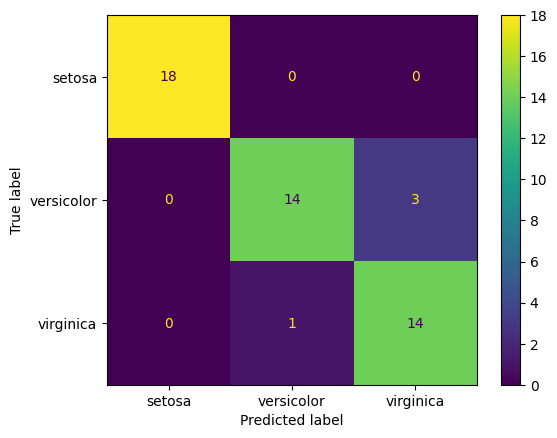

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)

In [94]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.93      0.82      0.88        17
   virginica       0.82      0.93      0.88        15

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



In [95]:
from sklearn.metrics import f1_score

f1_score(ytest, ypred_test, average = "macro")

0.9166666666666666

In [96]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, xtrain, ytrain, cv = 5, scoring = "f1_macro")

scores

array([0.95213675, 1.        , 1.        , 0.8968254 , 1.        ])

In [97]:
scores.mean()

np.float64(0.9697924297924299)

### From above metrics i have good f1_macro > 0.8 hence it is good model and can be used for out of sample prediction

### Step 8 - Out of Sample Prediction

In [98]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [99]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [100]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.312744,-1.308624
4,0.068082,-0.137353,0.766812,0.796477
5,-0.414976,1.012401,-1.390014,-1.308624
6,-0.294211,-0.137353,-0.084566,0.138633
7,0.792668,-0.137353,0.823571,1.059614
8,-0.656505,1.472303,-1.276496,-1.308624
9,-0.898033,0.782450,-1.276496,0.138633


In [101]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [102]:
probs = model.predict_proba(xnew_pre)
probs

array([[1.89406728e-02, 8.85275060e-01, 9.57842672e-02],
       [1.71232287e-04, 5.76448798e-02, 9.42183888e-01],
       [1.00216241e-01, 8.86865702e-01, 1.29180576e-02],
       [6.07228355e-01, 3.92334918e-01, 4.36727098e-04],
       [5.76733491e-03, 3.20903480e-01, 6.73329185e-01],
       [9.64315811e-01, 3.56833437e-02, 8.45833034e-07],
       [1.37263685e-01, 8.24430578e-01, 3.83057363e-02],
       [7.58252888e-04, 1.51353358e-01, 8.47888389e-01],
       [9.85567794e-01, 1.44318426e-02, 3.63140057e-07],
       [9.00464766e-01, 9.92462325e-02, 2.89001110e-04],
       [2.25271826e-02, 8.97330020e-01, 8.01427970e-02],
       [2.45696923e-02, 9.52509406e-01, 2.29209017e-02],
       [4.13819914e-06, 1.65885994e-02, 9.83407262e-01],
       [5.61740243e-03, 6.71400766e-01, 3.22981832e-01],
       [5.44172081e-04, 4.93875641e-01, 5.05580187e-01]])

In [103]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [104]:
xnew["species_pred"] = preds
xnew[model.classes_] = probs

In [105]:
xnew = xnew.round(4)

In [106]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0189,0.8853,0.0958
1,6.9,3.1,5.1,2.3,virginica,0.0002,0.0576,0.9422
2,5.1,2.5,3.0,1.1,versicolor,0.1002,0.8869,0.0129
3,4.4,2.9,NaN,0.2,setosa,0.6072,0.3923,0.0004
4,5.9,3.0,5.1,1.8,virginica,0.0058,0.3209,0.6733
5,5.5,3.5,1.3,0.2,setosa,0.9643,0.0357,0.0000
6,5.6,NaN,3.6,1.3,versicolor,0.1373,0.8244,0.0383
7,6.5,3.0,5.2,2.0,virginica,0.0008,0.1514,0.8479
8,5.3,3.7,1.5,0.2,setosa,0.9856,0.0144,0.0000
9,5.1,3.4,1.5,NaN,setosa,0.9005,0.0992,0.0003


In [107]:
xnew.to_csv("LogisticResult.csv", index = False)

### Save the preprocessor and model object

In [108]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [110]:
model

LogisticRegression()

In [111]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [112]:
joblib.dump(model, "logistic.joblib")

['logistic.joblib']

In [113]:
p = joblib.load("pre.joblib")

In [114]:
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [115]:
m = joblib.load("logistic.joblib")

In [116]:
m

LogisticRegression()